# TITLE PENDING
### Bachelor's thesis by Lukas Schießer

In [1]:
from rpy2.robjects.packages import importr
base = importr('base')
base._libPaths("C:/Users/lukas/Documents/R/win-library/4.0")
mice = importr('mice')

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import os
from scipy import stats

### Preprocessing

In [12]:
pd.options.display.max_columns = None
os.getcwd()
os.chdir("C:/code/Uni/ba")
data = pd.read_excel('blood-exams/covid_study_v2.xlsx')

In [13]:
data.insert(0,'male',(data["GENDER"] == "M").astype('int64'))
data.insert(0,'female',(data["GENDER"] == "F").astype('int64'))
data.drop(columns="GENDER", inplace=True)
data['Lymphocytes'] = pd.to_numeric(data['Lymphocytes'], errors='coerce')
data.loc[data["AGE"] < 18, "AGE"] = np.NaN
data.head()

,female,male,AGE,WBC,Platelets,Neutrophils,Lymphocytes,Monocytes,Eosinophils,Basophils,CRP,AST,ALT,ALP,GGT,LDH,SWAB
0,0,1,56.0,2.9,128.0,1.9,0.8,0.2,0.0,0.0,29.0,36.0,18.0,43.0,21.0,257.0,1
1,0,1,56.0,3.5,151.0,2.1,0.9,0.4,0.0,0.0,16.5,25.0,14.0,50.0,17.0,207.0,1
2,0,1,72.0,4.6,206.0,NaN,NaN,NaN,NaN,NaN,193.7,31.0,22.0,NaN,NaN,NaN,1
3,0,1,72.0,16.5,316.0,14.0,1.2,0.3,0.0,0.0,318.7,96.0,33.0,80.0,42.0,651.0,1
4,0,1,77.0,4.9,198.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1


In [14]:
data.describe()

,female,male,AGE,WBC,Platelets,Neutrophils,Lymphocytes,Monocytes,Eosinophils,Basophils,CRP,AST,ALT,ALP,GGT,LDH,SWAB
count,279.000000,279.000000,277.000000,277.000000,277.000000,209.000000,208.000000,209.000000,209.000000,208.000000,273.000000,277.000000,266.000000,131.000000,136.000000,194.000000,279.000000
mean,0.326165,0.673835,61.776173,8.553069,226.532130,6.200478,1.186538,0.605742,0.055024,0.014423,90.889011,54.202166,44.917293,89.893130,82.477941,380.448454,0.634409
std,0.469651,0.469651,17.815695,4.855353,101.174178,4.172581,0.806442,0.410049,0.132237,0.039116,94.421406,57.612797,45.503232,89.089864,132.702506,193.983520,0.482461
min,0.000000,0.000000,18.000000,1.100000,20.000000,0.500000,0.200000,0.000000,0.000000,0.000000,0.100000,11.000000,9.000000,34.000000,10.000000,98.000000,0.000000
25%,0.000000,0.000000,49.000000,5.100000,163.000000,3.500000,0.700000,0.400000,0.000000,0.000000,21.400000,27.000000,21.000000,57.500000,23.750000,243.250000,0.000000
50%,0.000000,1.000000,64.000000,7.100000,205.000000,5.100000,1.000000,0.500000,0.000000,0.000000,54.200000,36.000000,31.000000,71.000000,41.000000,328.000000,1.000000
75%,1.000000,1.000000,76.000000,10.700000,271.000000,7.500000,1.400000,0.700000,0.100000,0.000000,129.100000,60.000000,46.000000,90.000000,83.000000,454.500000,1.000000
max,1.000000,1.000000,98.000000,29.200000,620.000000,26.400000,7.200000,3.200000,1.300000,0.300000,478.000000,550.000000,335.000000,838.000000,839.000000,1195.000000,1.000000


In [5]:
alpha = 0.05
for col in data.columns[2:-1]:
    # TODO: Perform a Shapiro-Wilk normality test
    stat, p = stats.shapiro(data[col].dropna())

    print('{}: stat={:0.3f}, p={:0.3f}; {}'.format(col, stat, p, 'Probably Normal' if p > alpha else 'Probably not Normal'))

AGE: stat=0.976, p=0.000; Probably not Normal
WBC: stat=0.873, p=0.000; Probably not Normal
Platelets: stat=0.930, p=0.000; Probably not Normal
Neutrophils: stat=0.838, p=0.000; Probably not Normal
Lymphocytes: stat=0.785, p=0.000; Probably not Normal
Monocytes: stat=0.811, p=0.000; Probably not Normal
Eosinophils: stat=0.457, p=0.000; Probably not Normal
Basophils: stat=0.395, p=0.000; Probably not Normal
CRP: stat=0.836, p=0.000; Probably not Normal
AST: stat=0.556, p=0.000; Probably not Normal
ALT: stat=0.629, p=0.000; Probably not Normal
ALP: stat=0.420, p=0.000; Probably not Normal
GGT: stat=0.500, p=0.000; Probably not Normal
LDH: stat=0.877, p=0.000; Probably not Normal


In [6]:
stat, p = stats.shapiro(data.dropna())
print('stat={:0.3f}, p={:0.3f}; {}'.format(stat, p, 'Probably Normal' if p > alpha else 'Probably not Normal'))

stat=0.570, p=0.000; Probably not Normal


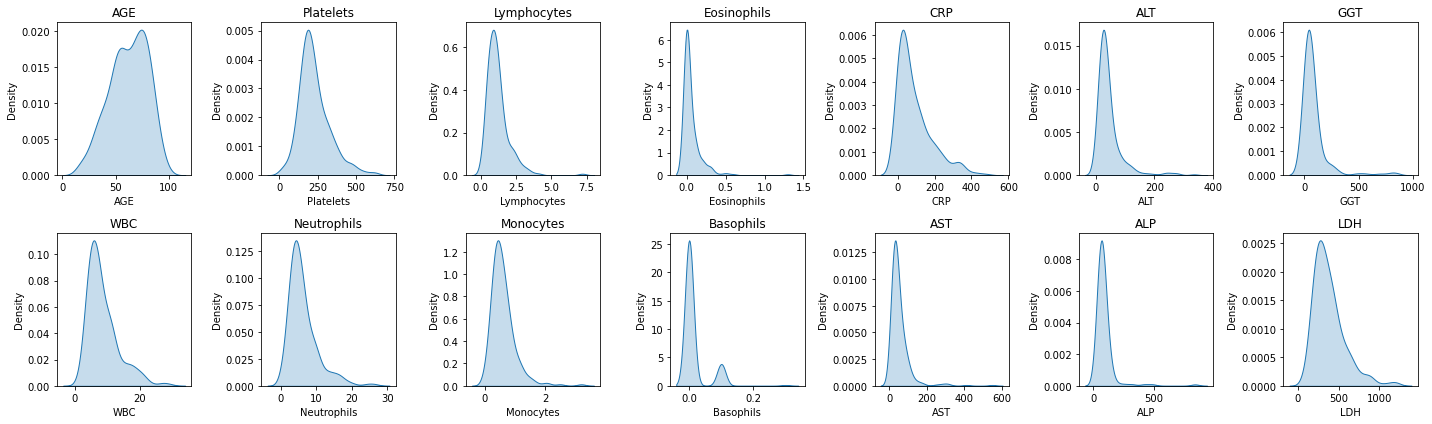

In [7]:
fig, axes = plt.subplots(ncols=7, nrows=2, figsize=(20,6))
for x in range(2,16):
    i = x % 2
    j = x // 2 - 1
    sns.kdeplot(data[data.columns[x]], ax=axes[i,j], fill=True)
    axes[i,j].set_title(data.columns[x])
plt.tight_layout()

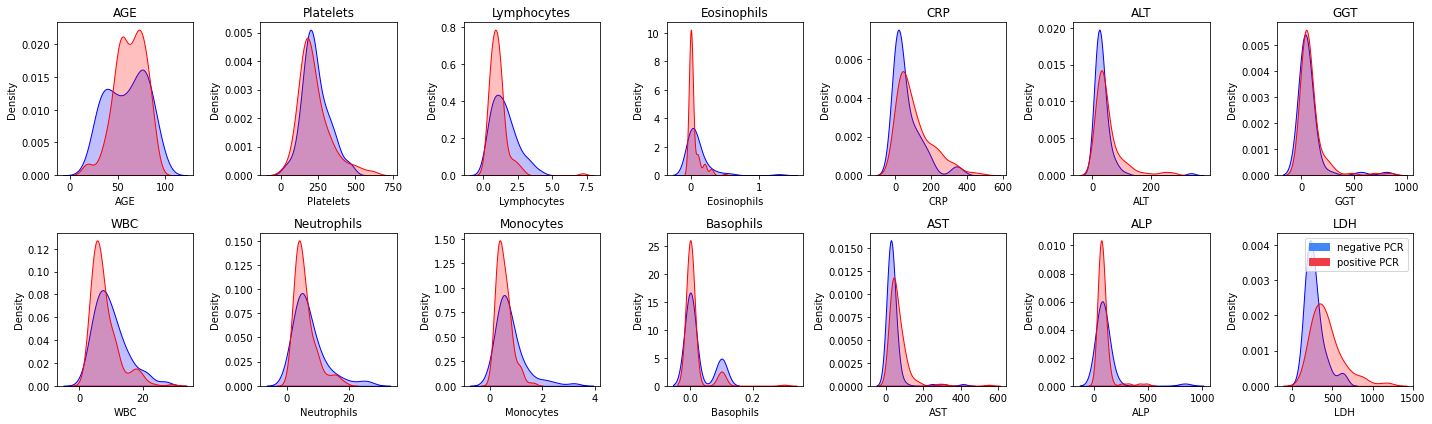

In [8]:
import matplotlib.patches as mpatches
blue_patch = mpatches.Patch(color='#4287f5', label='negative PCR')
red_patch = mpatches.Patch(color='#f03c45', label='positive PCR')
fig, axes = plt.subplots(ncols=7, nrows=2, figsize=(20,6))
for x in range(2,16):
    i = x % 2
    j = x // 2 - 1
    sns.kdeplot(data[data["SWAB"] == 0][data.columns[x]], ax=axes[i,j], color="blue", fill=True)
    sns.kdeplot(data[data["SWAB"] == 1][data.columns[x]], ax=axes[i,j], color="red", fill=True)
    axes[i,j].set_title(data.columns[x])
plt.legend(handles=[blue_patch, red_patch])
plt.tight_layout()

As you can see, most of the blood values do not follow a standard normal distribution. This can impact the imputation process negatively since most implementations of MICE assume MAR (missing at random) and normality regarding the variables.

In [9]:
data.skew(axis=0, skipna=True)

female         0.745619
male          -0.745619
AGE           -0.364711
WBC            1.465149
Platelets      1.117437
Neutrophils    1.856380
Lymphocytes    2.844919
Monocytes      2.428393
Eosinophils    5.129964
Basophils      3.233118
CRP            1.474657
AST            4.610819
ALT            3.361072
ALP            5.893664
GGT            3.977782
LDH            1.556878
SWAB          -0.561202
dtype: float64

In [18]:
data.isnull().any(axis=1).sum() / data.shape[0]

0.7025089605734767

### Model preparation

In [14]:
# import all necessary tools
from sklearn.model_selection import KFold, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
# import MissingIndicator to save missing value pattern for comparisons
from sklearn.impute import MissingIndicator
from sklearn.metrics import accuracy_score, balanced_accuracy_score, confusion_matrix
# imported confusion_matrix because it return TP, TN, FP, FN which are required to compute sensitivity and positive predictive value

In [6]:
X, y = data[data.columns[:-1]], data["SWAB"]
# save missing value pattern once to compare observed and imputed values for each variable and whole data set later

In [7]:
%%capture
import rpy2.robjects as ro
from rpy2.robjects.conversion import localconverter
from rpy2.robjects import pandas2ri
with localconverter(ro.default_converter + pandas2ri.converter):
    dm = mice.mice(X, m=5, maxit=20, seed=500);
    completed = mice.complete_mids(dm,1)

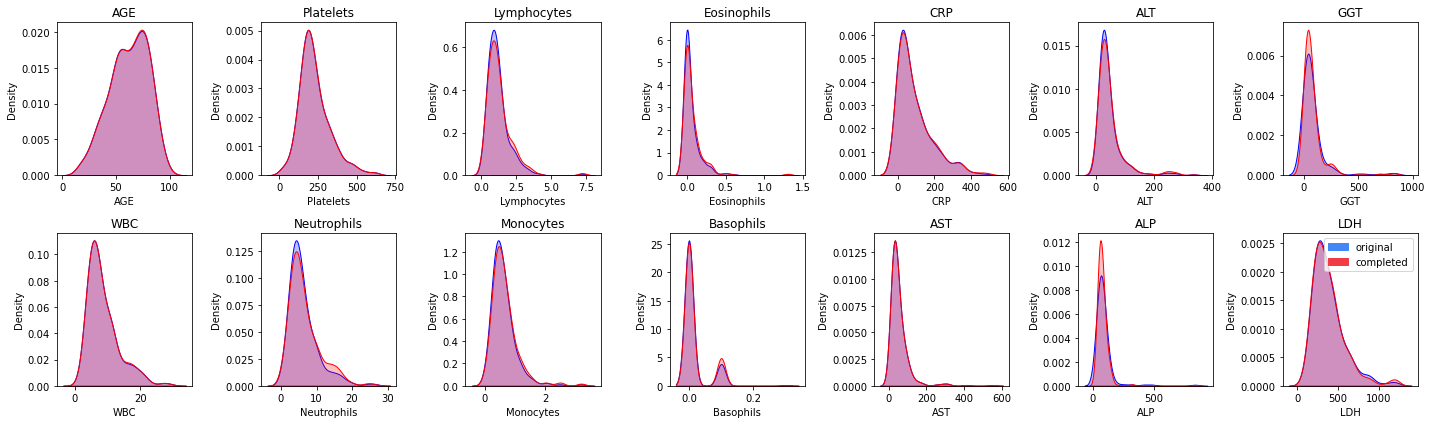

In [8]:
import matplotlib.patches as mpatches
blue_patch = mpatches.Patch(color='#4287f5', label='original')
red_patch = mpatches.Patch(color='#f03c45', label='completed')
fig, axes = plt.subplots(ncols=7, nrows=2, figsize=(20,6))
for x in range(2,16):
    i = x % 2
    j = x // 2 - 1
    sns.kdeplot(data[data.columns[x]], ax=axes[i,j], color="blue",fill=True)
    sns.kdeplot(completed[completed.columns[x]], ax=axes[i,j], color="red", fill=True)
    axes[i,j].set_title(completed.columns[x])
plt.legend(handles=[blue_patch, red_patch])
plt.tight_layout()

Applying MICE only to a small fraction of the data set (e.g., when using MCIE to only impute test set which has only up to 56 samples) we get very bad imputations as shown by the plots below. The distribution of the data is not sustained as it is when applying MICE to the whole data set. Therefore, I should apply MICE to the whole data set but during the nested cross validation process, so that I have a MICE model for each cross validation step/loop/split instead of defining two MICE models to impute the training and testing set individually.

In [9]:
%%capture
import rpy2.robjects as ro
from rpy2.robjects.conversion import localconverter
from rpy2.robjects import pandas2ri
with localconverter(ro.default_converter + pandas2ri.converter):
    dm = mice.mice(X.sample(n=56), m=5, maxit=20, seed=500);
    completed = mice.complete_mids(dm,1)

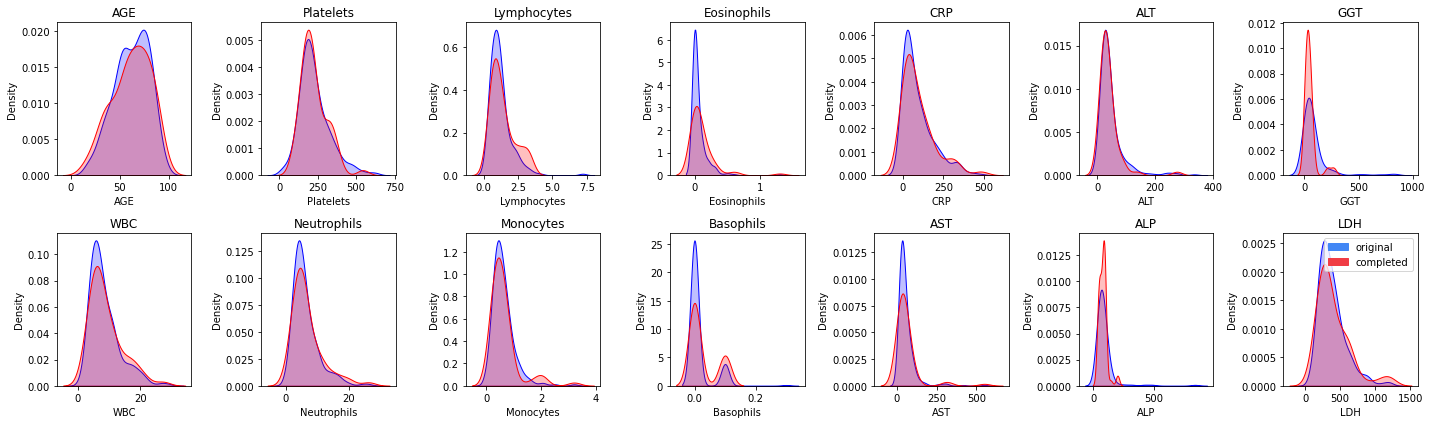

In [10]:
import matplotlib.patches as mpatches
blue_patch = mpatches.Patch(color='#4287f5', label='original')
red_patch = mpatches.Patch(color='#f03c45', label='completed')
fig, axes = plt.subplots(ncols=7, nrows=2, figsize=(20,6))
for x in range(2,16):
    i = x % 2
    j = x // 2 - 1
    sns.kdeplot(data[data.columns[x]], ax=axes[i,j], color="blue",fill=True)
    sns.kdeplot(completed[completed.columns[x]], ax=axes[i,j], color="red", fill=True)
    axes[i,j].set_title(completed.columns[x])
plt.legend(handles=[blue_patch, red_patch])
plt.tight_layout()

In [ ]:
# prepare 5-fold nested cross validation by defining outer loop of nested cv
cv_outer = KFold(n_splits=5, shuffle=True, random_state=1)
# question 1: paper states that missing data imputation done during nested cross validation,
# mice() apparently does not support fitting the mice model to the training set and then applying to both the training and test set
# either train on whole dataset and then split every cross-validation fold or fit two models for the training and test set respectively
# the second approach could avoid data leakage.
for train_index, test_index in cv_outer.split(X, y):
    # mice on whole dataset then split ?
    X_train, X_test = X[train_index,:], X[test_index,:]
    y_train, y_test = y[train_index], y[test_index]
    # mice on train and test individually ?
    # define inner loop of nested cross validation
    cv_inner = KFold(n_splits=5, shuffle=True, random_state=1)
    # instantiate model for hyperparameter search by means of GridSearch
    rf = RandomForestClassifier(random_state=1)
    # define the search space over which GridSearch should; currently just sample values, need to be defined later
    rf_space = {
        'n_estimators': [10, 100, 500],
        'max_features': [5, 10, 15, 17]
    }
    # define GridSearch for nested cv
    rf_search = GridSearchCV(rf, rf_space, scoring='accuracy', cv=cv_inner, refit=True)
    rf_result = rf_search.fit(X_train, y_train)
    # get the best performing model fit on the whole training set
    rf_best_model = rf_result.best_estimator_
    rf_yhat = rf_best_model.predict(X_test)
    lr_space = {
        'C': np.logspace(-3, 3, 7),
        'penalty': ['l1', 'l2']
    }
    lr = LogisticRegression(random_state=1)
    lr_search = GridSearchCV(lr, lr_space, scoring='accuracy', cv=cv_inner, refit=True)
    lr_result = lr_search.fit(X_train, y_train)
    lr_best_model =  lr_result.best_estimator_
    lr_yhat = lr_best_model.predict(X_test)
    # evaluate the model by means of accuracy, balanced accuracy, positive predictive value (PPV), sensitivity and AUC
    

In [ ]:
def calculate_eval_metrics(model, y_pred, y_true):
    acc = accuracy_score(y_true, y_pred)
    balanced_acc = balanced_accuracy_score(y_true, y_pred)
    # sensitivity = TP/TP+FN
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
    sensitivity = tp/(tp + fn)
    # PPV = TP/TP+FP
    ppv = tp/(tp + fp)
    # roc auc
    scores = model.predict_proba(testX)
    # roc_auc_score return area under the curve metric
    auc = roc_auc_score(y_true, scores)
    # roc_curve returns false positive rate (fpr), true positive rate (tpr) and thresholds (not needed for visualization)
    fpr, tpr, _ = roc_curve(y_true, scores)
    return acc, balanced_acc, sensitivity, pp, auc, (fpr, tpr)

[[1]](https://stats.stackexchange.com/questions/437487/cross-validation-and-multiple-imputation-for-missing-data) seems to indicate that training should happen on subset

[[2]](https://stackoverflow.com/questions/63175087/missing-values-imputation-with-five-fold-cross-validation-using-python)